In [200]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [52]:
BATCH_SIZE= 32
IMAGE_SIZE= 256
CHANNELS= 3
EPOCHS = 50

In [274]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
     "PlantVillage",
     shuffle=True,
     image_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size=BATCH_SIZE
    
)


AttributeError: module 'keras.api._v1.keras.preprocessing' has no attribute 'image_dataset_from_directory'

In [275]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [272]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

RuntimeError: input_dataset: Attempting to capture an EagerTensor without building a function.

<Figure size 1000x1000 with 0 Axes>

In [56]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [57]:
train_ds = dataset.take(54)
len(train_ds)

54

In [58]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [59]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [60]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [61]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split+test_split+val_split)== 1
    ds_size = len(ds)
    
    if shuffle:
       ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size= int(train_split* ds_size)
    val_size = int(val_split* ds_size)
    
    train_ds =ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).take(val_size)
    
    return train_ds, val_ds ,test_ds
    

In [62]:
train_ds, val_ds ,test_ds=get_dataset_partitions_tf(dataset)

In [63]:
len(train_ds)

54

In [64]:
len(val_ds)

6

In [65]:
len(test_ds)

6

In [66]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [67]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.7372549  0.69411767 0.6862745 ]
  [0.78431374 0.7411765  0.73333335]
  [0.7647059  0.72156864 0.7137255 ]
  ...
  [0.6156863  0.5686275  0.5686275 ]
  [0.63529414 0.5882353  0.5882353 ]
  [0.6509804  0.6039216  0.6039216 ]]

 [[0.7490196  0.7058824  0.69803923]
  [0.7921569  0.7490196  0.7411765 ]
  [0.7764706  0.73333335 0.7254902 ]
  ...
  [0.6156863  0.5686275  0.5686275 ]
  [0.62352943 0.5764706  0.5764706 ]
  [0.6313726  0.58431375 0.58431375]]

 [[0.75686276 0.7137255  0.7058824 ]
  [0.79607844 0.7529412  0.74509805]
  [0.7764706  0.73333335 0.7254902 ]
  ...
  [0.6313726  0.58431375 0.58431375]
  [0.6313726  0.58431375 0.58431375]
  [0.63529414 0.5882353  0.5882353 ]]

 ...

 [[0.49411765 0.40784314 0.41568628]
  [0.45882353 0.37254903 0.38039216]
  [0.39215687 0.30588236 0.3137255 ]
  ...
  [0.41960785 0.33333334 0.34117648]
  [0.49803922 0.4117647  0.41960785]
  [0.5294118  0.44313726 0.4509804 ]]

 [[0.4862745  0.4        0.40784314]
  [0.5254902  0.4392157  0.44705883]


In [68]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
    
])

In [69]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
    
])

In [271]:
input_shape=(BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu' ,input_shape=input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model.build(input_shape=input_shape)

ValueError: Your Layer or Model is in an invalid state. This can happen for the following cases:
 1. You might be interleaving estimator/non-estimator models or interleaving models/layers made in tf.compat.v1.Graph.as_default() with models/layers created outside of it. Converting a model to an estimator (via model_to_estimator) invalidates all models/layers made before the conversion (even if they were not the model converted to an estimator). Similarly, making a layer or a model inside a a tf.compat.v1.Graph invalidates all layers/models you previously made outside of the graph.
2. You might be using a custom keras layer implementation with custom __init__ which didn't call super().__init__.  Please check the implementation of <class 'keras.engine.sequential.Sequential'> and its bases.

In [270]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [269]:
model.compile(
      optimizer="adam",
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=['accuracy']

)

6/6 [==============================] - 4s 754ms/step - loss: 1.0942 - accuracy: 0.4464


[1.094220519065857, 0.4464285671710968]

In [265]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

ValueError: Calling `Model.fit` in graph mode is not supported when the `Model` instance was constructed with eager mode enabled. Please construct your `Model` instance in graph mode or call `Model.fit` with eager mode enabled.

In [266]:
scores=model.evaluate(test_ds)

ValueError: Calling `Model.evaluate` in graph mode is not supported when the `Model` instance was constructed with eager mode enabled. Please construct your `Model` instance in graph mode or call `Model.evaluate` with eager mode enabled.

In [83]:
scores

[0.07204946130514145, 0.976190447807312]

In [84]:
scores=model.evaluate(test_ds)

6/6 [==============================] - 4s 699ms/step - loss: 0.0720 - accuracy: 0.9762


In [85]:
history

In [135]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [268]:
scores=model.evaluate(test_ds)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

ValueError: Calling `Model.evaluate` in graph mode is not supported when the `Model` instance was constructed with eager mode enabled. Please construct your `Model` instance in graph mode or call `Model.evaluate` with eager mode enabled.

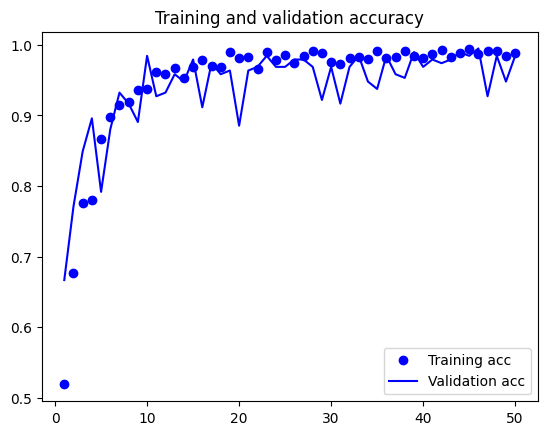

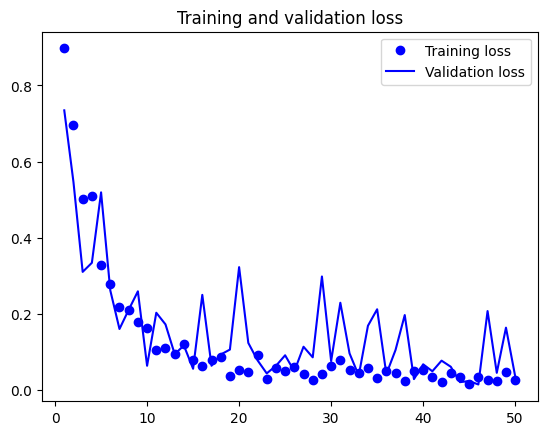

In [267]:


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [264]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label:",labels_batch[0].numpy())
    
    batch_prediction=model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

RuntimeError: input_dataset: Attempting to capture an EagerTensor without building a function.

In [168]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [263]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    

RuntimeError: input_dataset: Attempting to capture an EagerTensor without building a function.

<Figure size 1500x1500 with 0 Axes>

In [289]:

model.save("potato.h5")



ValueError: Weights for model 'sequential_9' have not yet been created. Weights are created when the model is first called on inputs or `build()` is called with an `input_shape`.

FileNotFoundError: [Errno 2] No such file or directory: 'Plantvillage.json'